<a href="https://colab.research.google.com/github/devill890/Trading/blob/main/Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

 pip install nsepy

In [ ]:
 from nsepy import get_history
 from datetime import date
 data = get_history(symbol="SBIN", start=date(2015,1,1), end=date(2020,1,31))
 data[['Open']].plot()
 data[['Close']].plot()

In [ ]:
nifty_next50 = get_history(symbol="NIFTY 50",
                            start=date(2000,1,1),
                            end=date(2023,1,1),
                            index=True)
print(nifty_next50)

In [ ]:
import pandas as pd
df = pd.DataFrame(nifty_next50)

In [ ]:
# saving the dataframe
df.to_excel('nifty50.xls')

<ipython-input-37-d5387929755d>:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel('nifty50.xls')


In [ ]:
df.head

<bound method NDFrame.head of                 Open      High       Low    Close     Volume      Turnover
Date                                                                      
2000-01-03   1482.15   1592.90   1482.15   1592.2   25358322  8.841500e+09
2000-01-04   1594.40   1641.95   1594.40   1638.7   38787872  1.973690e+10
2000-01-05   1634.55   1635.50   1555.05   1595.8   62153431  3.084790e+10
2000-01-06   1595.80   1639.00   1595.80   1617.6   51272875  2.531180e+10
2000-01-07   1616.60   1628.25   1597.20   1613.3   54315945  1.914630e+10
...              ...       ...       ...      ...        ...           ...
2022-12-26  17830.40  18084.10  17774.25  18014.6  176652342  1.370821e+11
2022-12-27  18089.80  18149.25  17967.45  18132.3  214257094  1.300064e+11
2022-12-28  18084.75  18173.10  18068.35  18122.5  193873167  1.399759e+11
2022-12-29  18045.70  18229.70  17992.80  18191.0  281052828  1.846605e+11
2022-12-30  18259.10  18265.25  18080.30  18105.3  192005563  1.447522

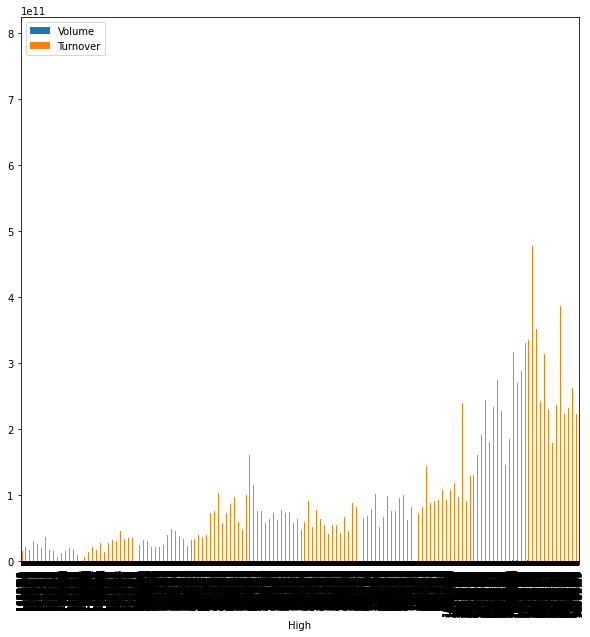

In [ ]:
df.plot(x="High", y=["Volume","Turnover"],
        kind="bar", figsize=(10, 10))
plt.show()

In [ ]:
pip install -U git+https://github.com/twopirllc/pandas-ta


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/twopirllc/pandas-ta to /tmp/pip-req-build-iiez3wni
  Running command git clone --filter=blob:none --quiet https://github.com/twopirllc/pandas-ta /tmp/pip-req-build-iiez3wni
  Resolved https://github.com/twopirllc/pandas-ta to commit 084dbe1c4b76082f383fa3029270ea9ac35e4dc7
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=219766 sha256=5b05ce5494f3bd373aa35dc68a6fb16f86b993dc2c924b22a0ced1e6117f17bd
  Stored in directory: /tmp/pip-ephem-wheel-cache-p9g8y89w/wheels/81/54/1e/21cf26f41d200ec11a164e13973db857a2d8281dc0ef73056b
Successfully built pandas-ta


In [ ]:

import pandas_ta as ta
help(df.ta)

Help on AnalysisIndicators in module pandas_ta.core object:

class AnalysisIndicators(BasePandasObject)
 |  AnalysisIndicators(pandas_obj)
 |  
 |  This Pandas Extension is named 'ta' for Technical Analysis. In other words,
 |  it is a Numerical Time Series Feature Generator where the Time Series data
 |  is biased towards Financial Market data; typical data includes columns
 |  named :"open", "high", "low", "close", "volume".
 |  
 |  This TA Library hopefully allows you to apply familiar and unique Technical
 |  Analysis Indicators easily with the DataFrame Extension named 'ta'. Even
 |  though 'ta' is a Pandas DataFrame Extension, you can still call Technical
 |  Analysis indicators individually if you are more comfortable with that
 |  approach or it allows you to easily and automatically apply the indicators
 |  with the strategy method. See: help(ta.strategy).
 |  
 |  By default, the 'ta' extension uses lower case column names: open, high,
 |  low, close, and volume. You can ove

In [ ]:

df.rename(columns = {'Open':'open'}, inplace = True)
df.rename(columns = {'Close':'close'}, inplace = True)
df.rename(columns = {'High':'high'}, inplace = True)
df.rename(columns = {'Low':'low'}, inplace = True)

In [ ]:
df.drop('Turnover', inplace=True, axis=1)


In [ ]:
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [ ]:
df['ATR'] = df.ta.atr(length=20)
df['RSI'] = df.ta.rsi()
df['Average'] = df.ta.midprice(length=1) #midprice
df['MA40'] = df.ta.sma(length=40)
df['MA80'] = df.ta.sma(length=80)
df['MA160'] = df.ta.sma(length=160)

# sma10 = ta.sma(df["Close"]) # Default length=10
# sma50 = ta.sma(df["Close"], length=50)
# ichimoku, span = ta.ichimoku(df["High"], df["Low"], df["Close"])

 
#  |  With 'default' columns: open, high, low, close, and volume.
#  |  >>> df.ta.hl2()
#  |  >>> df.ta(kind="hl2")
#  |  
#  |  With DataFrame columns: Open, High, Low, Close, and Volume.
#  |  >>> df.ta.hl2(high="High", low="Low")
#  |  >>> df.ta(kind="hl2", high="High", low="Low")


from scipy.stats import linregress
def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
backrollingN = 6
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
df['slopeMA40'] = df['MA40'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['slopeMA80'] = df['MA80'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['slopeMA160'] = df['MA160'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['AverageSlope'] = df['Average'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['RSISlope'] = df['RSI'].rolling(window=backrollingN).apply(get_slope, raw=True)

In [ ]:
df.tail()

,open,high,low,close,Volume,ATR,RSI,Average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope
Date,,,,,,,,,,,,,,,,
2022-12-26,17830.40,18084.10,17774.25,18014.6,176652342,198.610428,40.672826,17929.175,18361.77375,17914.708125,17202.611250,9.806143,7.020964,8.127045,-95.297143,-2.918596
2022-12-27,18089.80,18149.25,17967.45,18132.3,214257094,197.769907,44.800284,18058.350,18364.77625,17922.076875,17214.051563,6.543786,6.202089,8.811500,-76.355714,-1.036131
2022-12-28,18084.75,18173.10,18068.35,18122.5,193873167,193.118912,44.522541,18120.725,18364.20375,17929.365000,17225.816875,4.150214,5.972286,9.772848,-39.382857,0.865909
2022-12-29,18045.70,18229.70,17992.80,18191.0,281052828,195.307966,46.996084,18111.250,18366.90750,17935.930000,17238.466250,2.578643,6.109929,10.732268,9.551429,2.088301
2022-12-30,18259.10,18265.25,18080.30,18105.3,192005563,194.790068,44.332884,18172.775,18368.22250,17941.551250,17252.824375,2.158500,6.317875,12.014304,54.217143,2.241000


In [ ]:
ichimoku, span = ta.ichimoku(df["high"], df["low"], df["close"])
ichimoku, span.head()

In [ ]:
# Tenkan-sen (Conversion Line): (9-period high + 9-period low)/2))
period9_high = df['high'].rolling(window=9).max()
period9_low =  df['low'].rolling(window=9).min()
tenkan_sen = (period9_high + period9_low) / 2

# Kijun-sen (Base Line): (26-period high + 26-period low)/2))
period26_high =df['high'].rolling(window=26).max()
period26_low =  df['low'].rolling(window=26).min()
kijun_sen = (period26_high + period26_low) / 2

# Senkou Span A (Leading Span A): (Conversion Line + Base Line)/2))
senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(26)

# Senkou Span B (Leading Span B): (52-period high + 52-period low)/2))
period52_high = df['high'].rolling(window=52).max()
period52_low = df['low'].rolling(window=52).min()
senkou_span_b = ((period52_high + period52_low) / 2).shift(26)

# The most current closing price plotted 22 time periods behind (optional)
chikou_span = df['close'].shift(-26) # 22 according to investopedia

In [ ]:
#Target flexible way
pipdiff = 500*1e-5 #for TP
SLTPRatio = 2 #pipdiff/Ratio gives SL

def mytarget(barsupfront, df1):
    length = len(df1)
    high = list(df1['high'])
    low = list(df1['low'])
    close = list(df1['close'])
    open = list(df1['open'])
    trendcat = [None] * length
    
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)

            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                trendcat[line] = 1 #-1 downtrend
                break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend
            
    return trendcat

In [ ]:
# mytarget(barsfront to take into account, dataframe)
df['mytarget'] = mytarget(16, df)
df.head()

,open,high,low,close,Volume,ATR,RSI,Average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope,mytarget
Date,,,,,,,,,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322,NaN,NaN,1537.525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872,NaN,NaN,1618.175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431,NaN,NaN,1595.275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875,NaN,NaN,1617.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945,NaN,NaN,1612.725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
df.fillna(0)

,open,high,low,close,Volume,ATR,RSI,Average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope,mytarget
Date,,,,,,,,,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322,0.000000,0.000000,1537.525,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872,0.000000,0.000000,1618.175,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431,0.000000,0.000000,1595.275,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875,0.000000,0.000000,1617.400,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945,0.000000,0.000000,1612.725,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,17830.40,18084.10,17774.25,18014.6,176652342,198.610428,40.672826,17929.175,18361.77375,17914.708125,17202.611250,9.806143,7.020964,8.127045,-95.297143,-2.918596,0.0
2022-12-27,18089.80,18149.25,17967.45,18132.3,214257094,197.769907,44.800284,18058.350,18364.77625,17922.076875,17214.051563,6.543786,6.202089,8.811500,-76.355714,-1.036131,0.0
2022-12-28,18084.75,18173.10,18068.35,18122.5,193873167,193.118912,44.522541,18120.725,18364.20375,17929.365000,17225.816875,4.150214,5.972286,9.772848,-39.382857,0.865909,0.0


<ipython-input-103-edde704a77c3>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_model.hist(ax = ax)


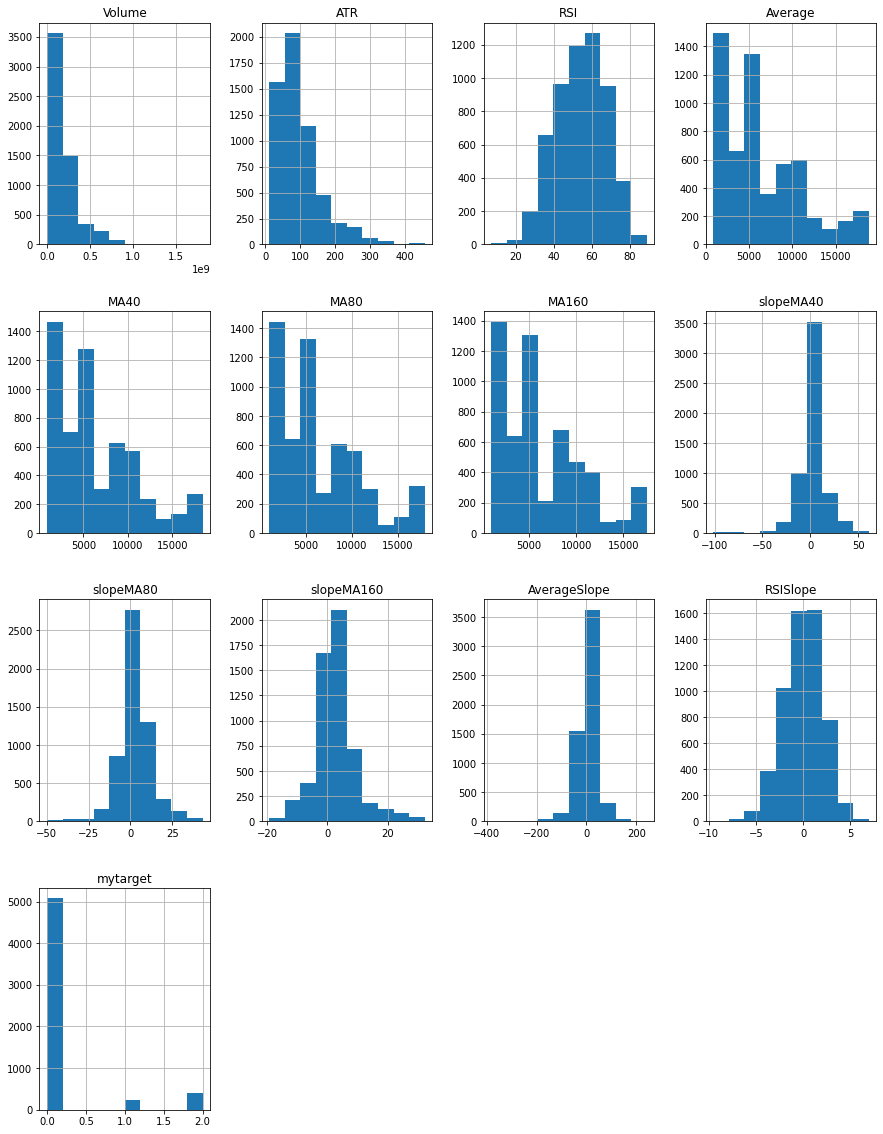

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_model= df[['Volume', 'ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'slopeMA40', 'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope', 'mytarget']] 
df_model.hist(ax = ax)
plt.show()

In [ ]:
from matplotlib import pyplot
df_up=df.ATR[ df['mytarget'] == 2 ]
df_down=df.ATR[ df['mytarget'] == 1 ]
df_unclear=df.ATR[ df['mytarget'] == 0 ]
pyplot.hist(df_unclear, bins=100, alpha=0.5, label='unclear')
pyplot.hist(df_down, bins=100, alpha=0.5, label='down')
pyplot.hist(df_up, bins=100, alpha=0.5, label='up')

pyplot.legend(loc='upper right')
pyplot.show()

NameError: ignored

In [ ]:
df_model=df_model.dropna()
attributes=['ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'slopeMA40', 'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope']
X = df_model[attributes]
y = df_model["mytarget"]

print(X)

                   ATR        RSI    Average         MA40          MA80  \
Date                                                                      
2000-08-29   28.985265  49.174837   1367.100   1395.14875   1391.255000   
2000-08-30   28.393377  51.645412   1377.325   1391.76500   1391.222500   
2000-08-31   28.043638  56.639137   1386.600   1388.46625   1391.609375   
2000-09-04   28.594061  64.051558   1414.550   1386.24000   1393.149375   
2000-09-05   27.851723  64.149625   1427.775   1384.00625   1394.967500   
...                ...        ...        ...          ...           ...   
2022-11-30  179.844881  73.018045  18716.300  17881.68875  17726.883125   
2022-12-01  177.315137  74.159283  18832.900  17929.81750  17744.687500   
2022-12-02  177.114380  67.545660  18710.575  17965.36250  17761.113750   
2022-12-05  175.121161  67.677672  18659.975  17999.59375  17777.408125   
2022-12-06  172.522603  64.357301  18616.400  18032.79625  17791.378750   

                   MA160

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=200, weights='uniform', algorithm='kd_tree', leaf_size=30, p=1, metric='minkowski', metric_params=None, n_jobs=1)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy train: %.2f%%" % (accuracy_train * 100.0))
print("Accuracy test: %.2f%%" % (accuracy_test * 100.0))

#------------------------------------------------------------------
#--- How should I compare my accuracy ?
print(df_model['mytarget'].value_counts()*100/df_model['mytarget'].count())

# Random Model, gambler?
pred_test = np.random.choice([0, 1, 2], len(y_pred_test))
accuracy_test = accuracy_score(y_test, pred_test)
print("Accuracy Gambler: %.2f%%" % (accuracy_test * 100.0))

Accuracy train: 89.46%
Accuracy test: 89.17%
0.0    89.404332
2.0     6.624549
1.0     3.971119
Name: mytarget, dtype: float64
Accuracy Gambler: 32.13%


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 89.5532%
****Test Results****
Accuracy: 89.1697%


In [ ]:
#random sampling
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#sequential sampling
train_index = int(0.8 * len(X))
X_train, X_test = X[:train_index], X[train_index:]
y_train, y_test = y[:train_index], y[train_index:]

model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 87.8159%
****Test Results****
Accuracy: 96.5704%


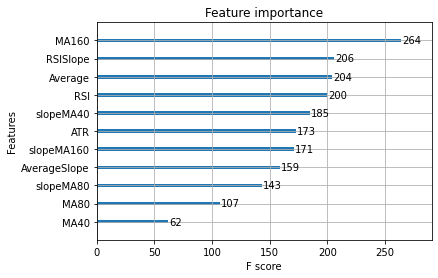

In [ ]:
from matplotlib import pyplot
from xgboost import plot_importance
#plot feature importance
plot_importance(model)
pyplot.show()